In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
data = pd.read_csv('spam_ham_dataset.csv')
data

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.dropna(inplace = True)
data.drop('Unnamed: 0',axis = 1,inplace = True)
data

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [6]:
X = data['text']
y = data['label_num']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [8]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [9]:
naive_model = MultinomialNB()
naive_model.fit(X_train_vec, y_train)
y_pred_nb = naive_model.predict(X_test_vec)

In [10]:
print(f'accuracy with Naive Bayes :{accuracy_score(y_test,y_pred_nb)}')

accuracy with Naive Bayes :0.9719806763285024


In [11]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_vec,y_train)
y_pred_DT = DT_model.predict(X_test_vec)

In [12]:
print(f'accuracy with Decision Tree :{accuracy_score(y_test,y_pred_DT)}')

accuracy with Decision Tree :0.9439613526570049


In [13]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train_vec,y_train)
y_pred_KNN = KNN_model.predict(X_test_vec)

In [14]:
print(f'accuracy with KNN :{accuracy_score(y_test,y_pred_KNN)}')

accuracy with KNN :0.8618357487922705


In [15]:
data.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [16]:
data.duplicated().sum()

178

In [17]:
def cm(y_test, y_pred):
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])


    return cm_display

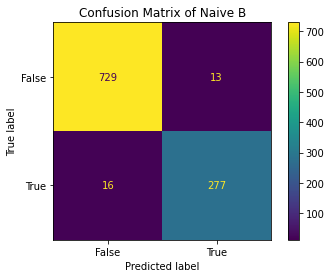

In [18]:
cm_nb= cm(y_test, y_pred_nb)
model_name = 'Naive B'
cm_nb.plot()
plt.title("Confusion Matrix of {}".format(model_name))
plt.show()

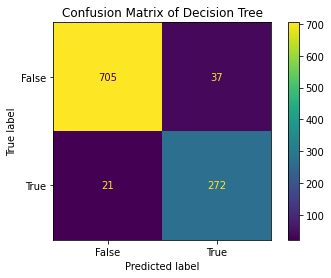

In [19]:
cm_dt= cm(y_test, y_pred_DT)
model_name = 'Decision Tree'
cm_dt.plot()
plt.title("Confusion Matrix of {}".format(model_name))
plt.show()

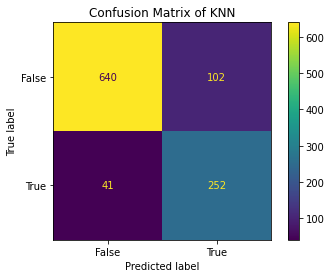

In [20]:
cm_knn= cm(y_test, y_pred_KNN)
model_name = 'KNN'
cm_knn.plot()
plt.title("Confusion Matrix of {}".format(model_name))
plt.show()